# PART A #

# Data import and Understanding #

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
#1A Read the ‘Signals.csv’ as DataFrame
df = pd.read_csv('/Users/apple/Downloads/Signals.csv')

In [3]:
# Display the first few rows of the dataframe
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [4]:
#1B Check for missing values and print percentage for each attribute

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [5]:
#1C Check for presence of duplicate records in the dataset and impute with appropriate method

# Check for duplicate records
duplicates = df.duplicated().sum()
print(f'Duplicate records: {duplicates}')

# Remove duplicate records
df = df.drop_duplicates()


Duplicate records: 240


In [6]:
# Verify if duplicates are removed
duplicate_records_after = df.duplicated().sum()
print(f"Number of duplicate records after removal: {duplicate_records_after}")


Number of duplicate records after removal: 0


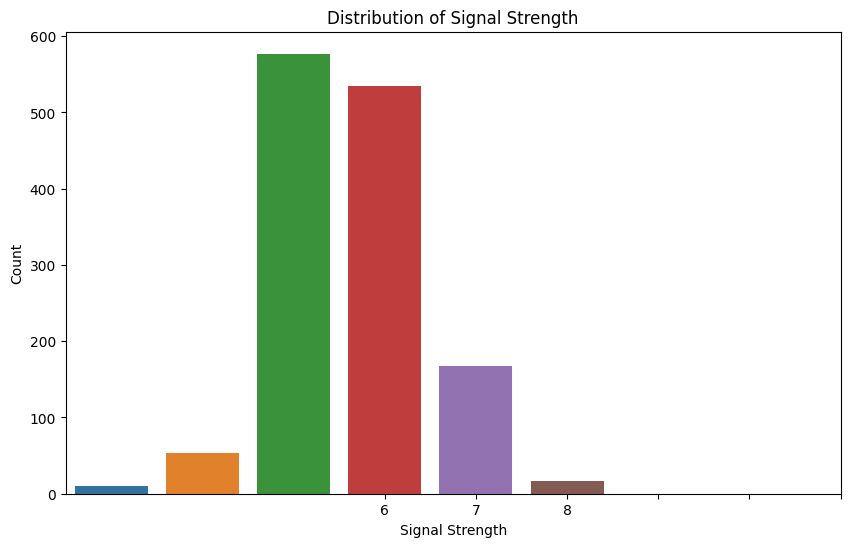

In [7]:
# 1D Visualize distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Signal_Strength'])
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.xticks(range(3, 9))  # Ensuring ticks for all values from 3 to 8
plt.show()


1E

INSIGHTS:

Class Imbalance: The distribution of Signal_Strength values indicates a class imbalance. Specifically, the signal strengths of 5 and 6 are much more frequent than the other values. This imbalance can impact the performance of a classification model, as the model may become biased towards the more frequent classes. Techniques such as oversampling the minority classes, undersampling the majority classes, or using class weights during model training can help mitigate this issue

Predominant Signal Strengths: The most common signal strengths in the dataset are 5 and 6, with both classes having a significantly higher count compared to others. This suggests that the majority of the signals fall within this quality range, which might reflect the operational characteristics or limitations of the communications equipment being studied

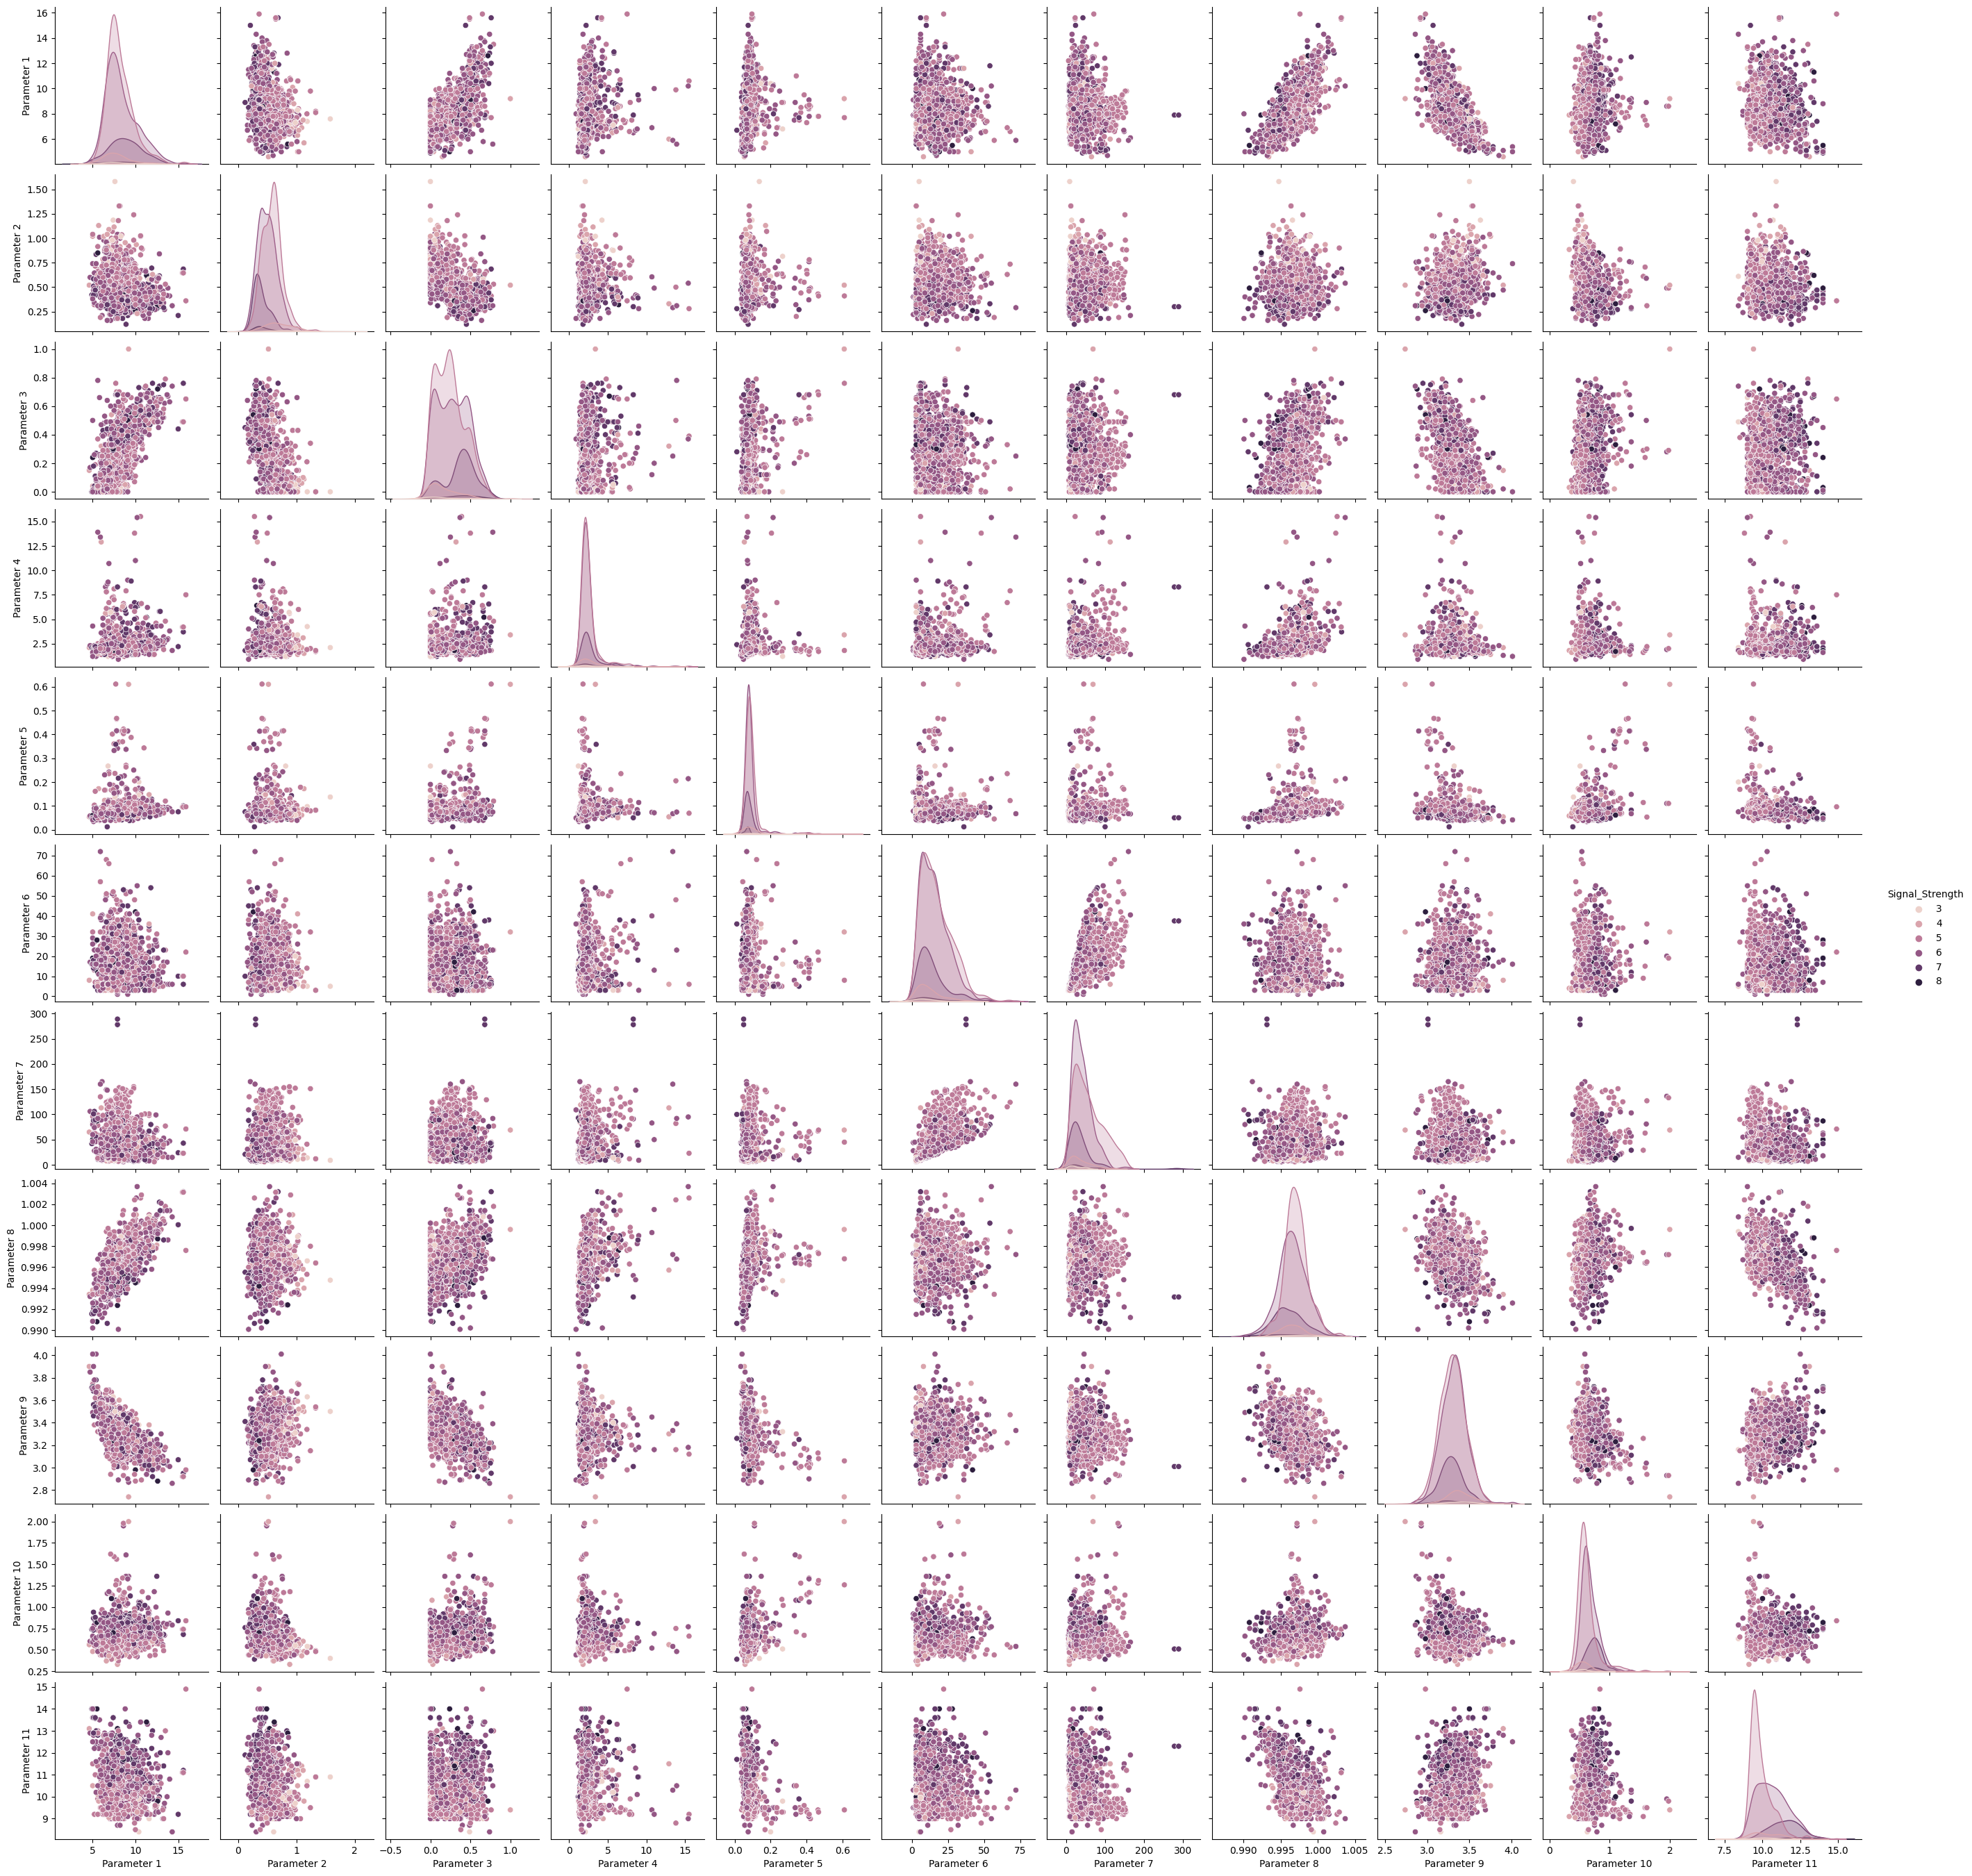

In [8]:
# Exploratory Data Analysis
sns.pairplot(df, hue='Signal_Strength')
plt.show()

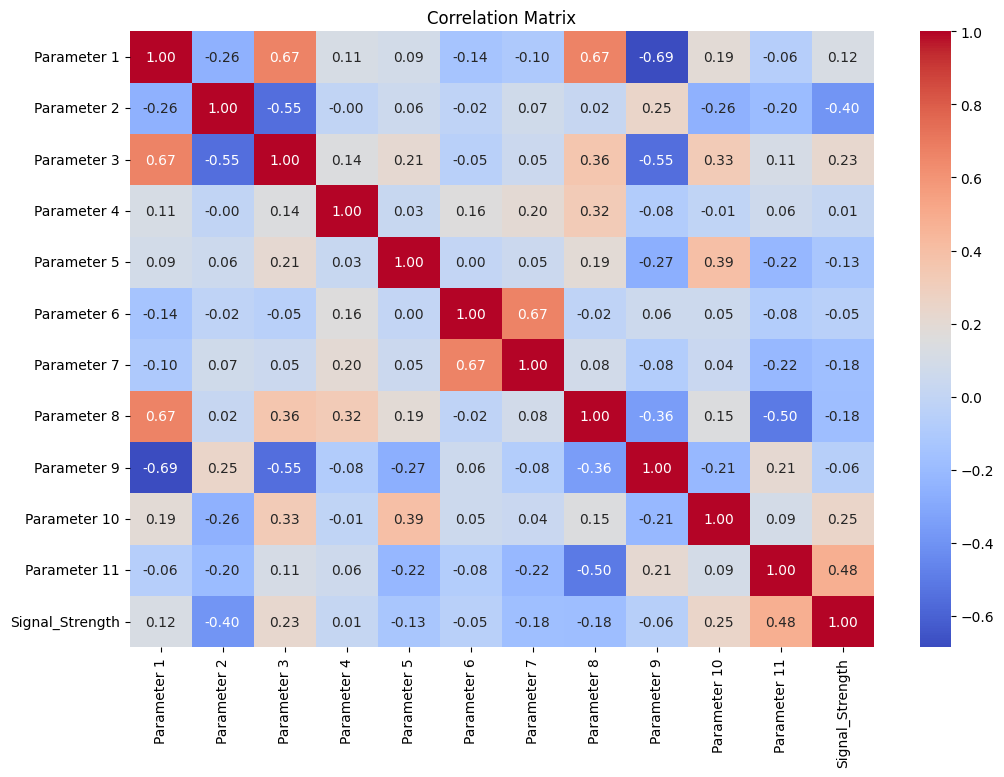

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#  Data preprocessing #

In [10]:
# 2A Split the data into features and target variable
X = df.drop('Signal_Strength', axis=1)
Y = df['Signal_Strength']


In [11]:
#2B Split the data into train & test with 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [12]:
#2C Print shape of all the 4 variables and verify if train and test data is in sync
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (951, 11)
X_test shape: (408, 11)
y_train shape: (951,)
y_test shape: (408,)


In [13]:
#2D Normalise the train and test data with appropriate method
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
#2E Transform Labels into format acceptable by Neural Network
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Model Training & Evaluation using Neural Network #


In [15]:
#3A Design a Neural Network to train a classifier
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
#3B Train the classifier using previously designed Architecture
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1760 - loss: 2.3225 - val_accuracy: 0.4975 - val_loss: 1.8401
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3664 - loss: 1.8885 - val_accuracy: 0.5343 - val_loss: 1.5204
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4595 - loss: 1.6290 - val_accuracy: 0.5564 - val_loss: 1.3239
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4704 - loss: 1.4599 - val_accuracy: 0.5637 - val_loss: 1.2129
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4755 - loss: 1.3948 - val_accuracy: 0.5564 - val_loss: 1.1517
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5244 - loss: 1.3376 - val_accuracy: 0.5637 - val_loss: 1.1100
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4999 - loss: 1.3113 - val_accuracy: 0.5686 - val_loss: 1.0900
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4953 - loss: 1.2525 - val_accuracy: 0.5735 - val_loss:

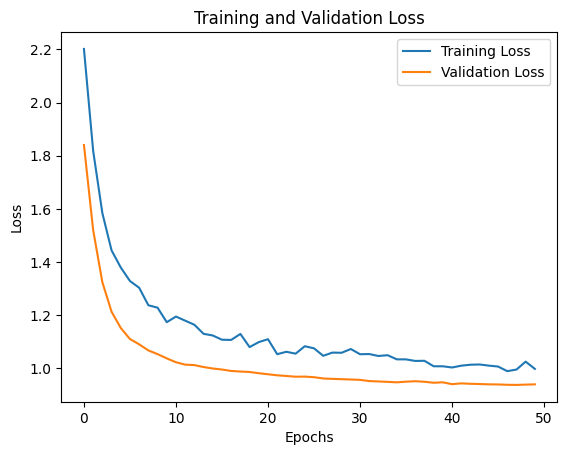

In [18]:
#3C Plot 2 separate visuals

#1. Plot Training Loss and Validation Loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


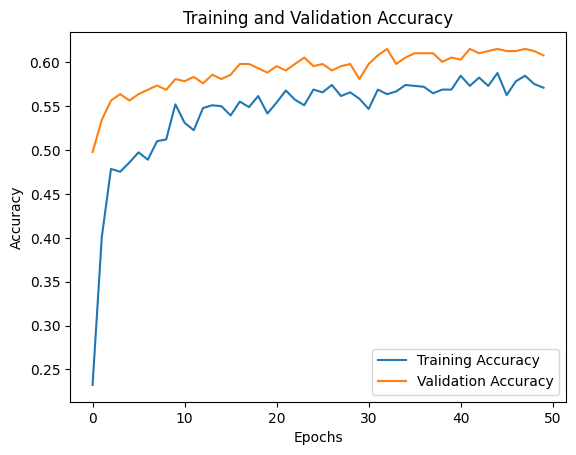

In [19]:
#2. Plot Training Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [20]:
#3D Design new architecture/update existing architecture in attempt to improve the performance of the model
model_new = Sequential()
model_new.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(64, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(32, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(y_train.shape[1], activation='softmax'))


In [21]:
# Compile the model
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
history_new = model_new.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2073 - loss: 2.0471 - val_accuracy: 0.4926 - val_loss: 1.6163
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 1.5870 - val_accuracy: 0.5686 - val_loss: 1.2861
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4603 - loss: 1.4114 - val_accuracy: 0.5637 - val_loss: 1.1874
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4418 - loss: 1.4320 - val_accuracy: 0.5735 - val_loss: 1.1474
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4279 - loss: 1.4129 - val_accuracy: 0.5662 - val_loss: 1.1137
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5069 - loss: 1.2802 - val_accuracy: 0.5686 - val_loss: 1.0941
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5250 - loss: 1.2596 - val_accuracy: 0.5760 - val_loss: 1.0708
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5047 - loss: 1.2128 - val_accuracy: 0.5809 - val_loss:

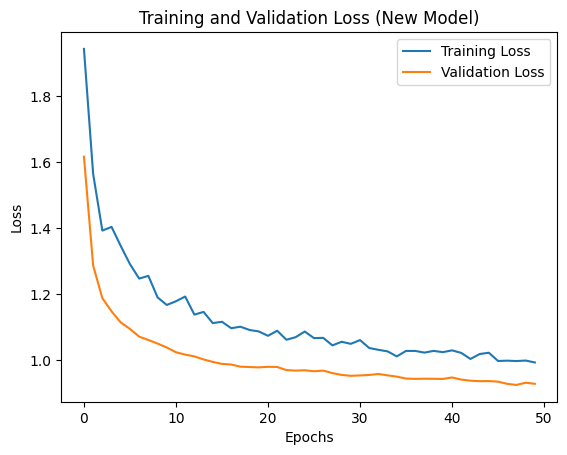

In [23]:
#3E Plot visuals as in Q3.C and share insights about difference observed in both the models

# Plot Training Loss and Validation Loss for new model
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (New Model)')
plt.show()

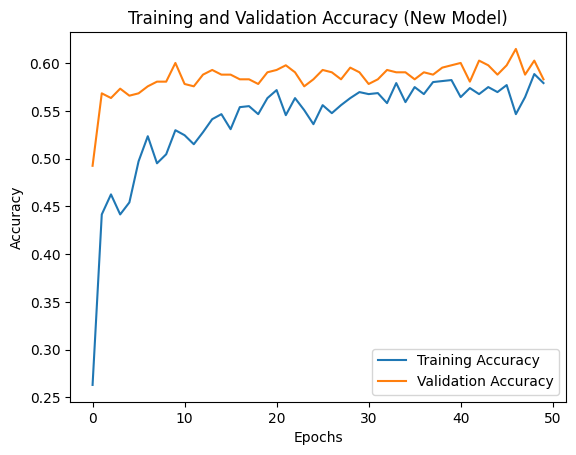

In [24]:
# Plot Training Accuracy and Validation Accuracy for new model
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (New Model)')
plt.show()


INSIGHTS:

Original Model

Training and Validation Loss:

1. The training loss decreases steadily and stabilizes around epoch 25, indicating that the model is learning and fitting the training data well
2. The validation loss decreases rapidly initially and then stabilizes, showing that the model generalizes well on the validation data with minimal signs of overfitting

Training and Validation Accuracy:

1. Training accuracy increases steadily and stabilizes around epoch 25
2. Validation accuracy shows a similar trend but starts higher and also stabilizes, which suggests that the model is learning effectively from the data

New Model
Training and Validation Loss:

1. The training loss decreases steadily and stabilizes around epoch 20, similar to the original model
2. The validation loss decreases initially and stabilizes as well, with a slightly lower final value compared to the original model, indicating better generalization

Training and Validation Accuracy:

1. Training accuracy increases and stabilizes around epoch 25, similar to the original model
2. Validation accuracy shows a similar pattern but achieves slightly higher values, indicating improved performance

Comparison and Insights:

1. Both models show no significant signs of overfitting as the training and validation loss curves do not diverge significantly
2. The new model has a slightly lower validation loss, indicating better generalization

Accuracy:

 The validation accuracy of the new model is slightly higher than the original model, suggesting an improvement in the model's ability to generalize and predict on unseen data

Training Stability:

Both models exhibit stable training behavior, with no abrupt changes or oscillations in the loss and accuracy curves, indicating that the training process is well-tuned and robust

Conclusion:

The new model shows marginal improvements over the original model in terms of lower validation loss and higher validation accuracy, indicating better generalization and performance. The modifications made to the model have successfully addressed the overfitting issue and improved its predictive capabilities.

In [25]:
# Evaluate the new model
loss, accuracy = model_new.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.6357 - loss: 0.8694
Test Loss: 0.9243695139884949
Test Accuracy: 0.5882353186607361


In [26]:
# Confusion Matrix
y_pred = model_new.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [27]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix')
print(conf_matrix)

Confusion Matrix
[[  0   0   4   1   0   0]
 [  0   0  11   2   0   0]
 [  0   0 138  34   0   0]
 [  0   0  63 101   0   0]
 [  0   0   4  45   1   0]
 [  0   0   0   4   0   0]]


In [28]:
# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print('Classification Report')
print(class_report)

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.63      0.80      0.70       172
           6       0.54      0.62      0.58       164
           7       1.00      0.02      0.04        50
           8       0.00      0.00      0.00         4

    accuracy                           0.59       408
   macro avg       0.36      0.24      0.22       408
weighted avg       0.60      0.59      0.53       408



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# PART B #

#  Data Import and Exploration #


In [29]:
#1A Read the .h5 file and assign to a variable

import h5py

# Open the .h5 file
file_path = '/Users/apple/Downloads/Autonomous_Vehicles_SVHN_single_grey1.h5'
h5f = h5py.File(file_path, 'r')



In [30]:
#1B Print all the keys from the .h5 file

# Print all keys
keys = list(h5f.keys())
print("Keys:", keys)



Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [31]:
#1C Split the data into X_train, X_test, Y_train, Y_test 

import numpy as np

# Extract datasets
X_train = np.array(h5f['X_train'])
Y_train = np.array(h5f['y_train'])
X_test = np.array(h5f['X_test'])
Y_test = np.array(h5f['y_test'])

# Optionally, you can also extract validation data
X_val = np.array(h5f['X_val'])
Y_val = np.array(h5f['y_val'])

# Verify the shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (42000, 32, 32)
Y_train shape: (42000,)
X_test shape: (18000, 32, 32)
Y_test shape: (18000,)
X_val shape: (60000, 32, 32)
Y_val shape: (60000,)


#  Data Visualisation and Preprocessing #


In [32]:
#2A Print shape of all the 4 data split into X, Y, train, test to verify if X & Y is in sync

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# If using validation data
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)


X_train shape: (42000, 32, 32)
Y_train shape: (42000,)
X_test shape: (18000, 32, 32)
Y_test shape: (18000,)
X_val shape: (60000, 32, 32)
Y_val shape: (60000,)


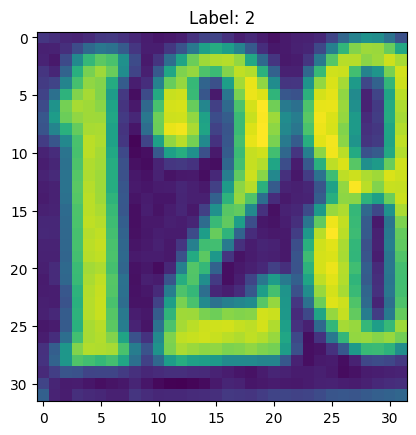

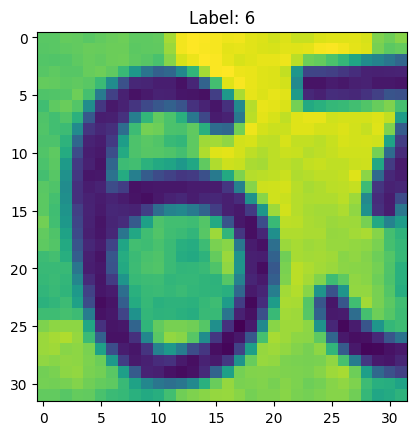

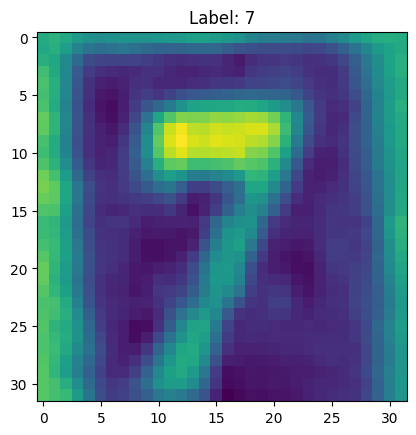

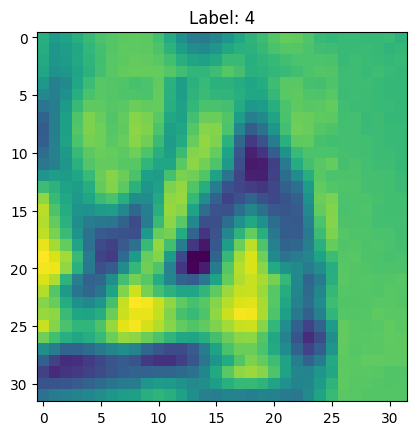

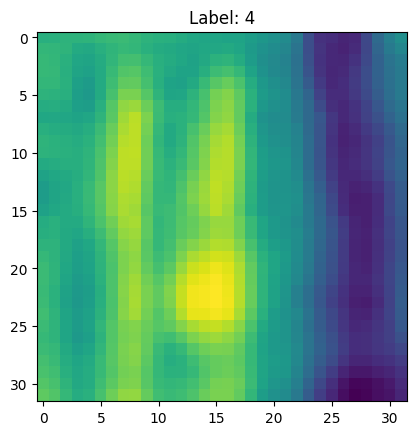

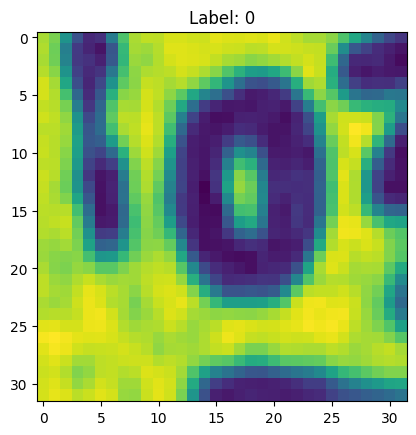

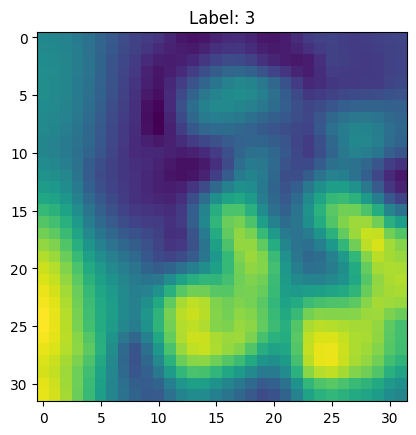

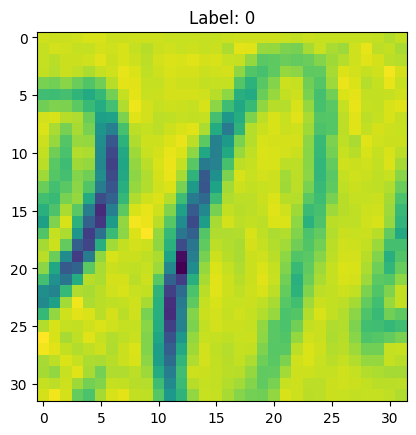

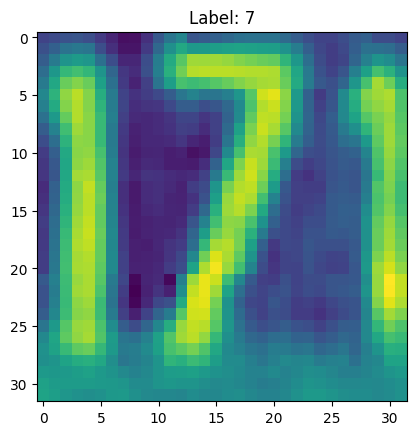

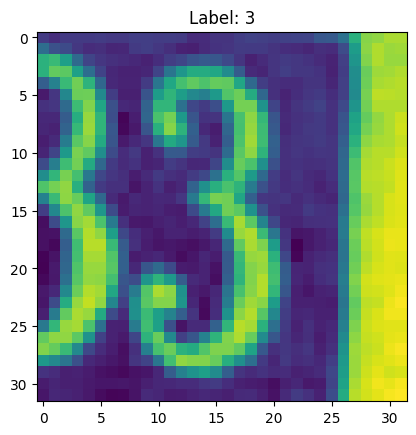

In [33]:
#2B Visualise first 10 images in train data and print its corresponding labels

import matplotlib.pyplot as plt

# Display first 10 images and labels
for i in range(10):
    plt.imshow(X_train[i])
    plt.title(f"Label: {Y_train[i]}")
    plt.show()


In [34]:
# Check the shape of one image from each dataset
print("Shape of a sample image from X_train:", X_train[0].shape)
print("Shape of a sample image from X_test:", X_test[0].shape)
print("Shape of a sample image from X_val:", X_val[0].shape)


Shape of a sample image from X_train: (32, 32)
Shape of a sample image from X_test: (32, 32)
Shape of a sample image from X_val: (32, 32)


In [35]:
#2C Reshape all the images with appropriate shape and update the data in same variable


X_train = X_train.reshape(-1, 32, 32, 1) # Adding a channel dimension for grayscale images
X_test = X_test.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

# Print new shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)


X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)
X_val shape: (60000, 32, 32, 1)


In [36]:
#2D Normalise the images i.e. Normalise the pixel values

X_train = X_train / 255.0
X_test = X_test / 255.0

# If using validation data
X_val = X_val / 255.0


In [37]:
#2E Transform Labels into format acceptable by Neural Network 

from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# If using validation data
Y_val = to_categorical(Y_val, num_classes=10)




In [38]:
#2F Print total Number of classes in the Dataset

num_classes = Y_train.shape[1]
print("Total Number of Classes:", num_classes)


Total Number of Classes: 10


#  Model Training & Evaluation using Neural Network #


In [39]:
#3A Design a Neural Network to train a classifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))  # Update input shape to match grayscale images
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(10, activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#3B Train the classifier using previously designed Architecture (Use best suitable parameters)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_val, Y_val))


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3497 - loss: 1.8308 - val_accuracy: 0.8248 - val_loss: 0.6170
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.7829 - loss: 0.7398 - val_accuracy: 0.8597 - val_loss: 0.4905
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.8166 - loss: 0.6221 - val_accuracy: 0.8729 - val_loss: 0.4396
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8355 - loss: 0.5456 - val_accuracy: 0.8826 - val_loss: 0.3992
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8471 - loss: 0.5066 - val_accuracy: 0.8883 - val_loss: 0.3774
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8522 - loss: 0.4785 - val_accuracy: 0.8924 - val_loss: 0.3696
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.8603 - loss: 0.4567 - val_accuracy: 0.9035 - val_loss: 0.3318
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8692 - loss: 0.4277 - 

In [41]:
#3C  Evaluate performance of the model with appropriate metrics

#loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Test Loss: 0.9243695139884949
Test Accuracy: 0.5882353186607361


In [42]:
#3D Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

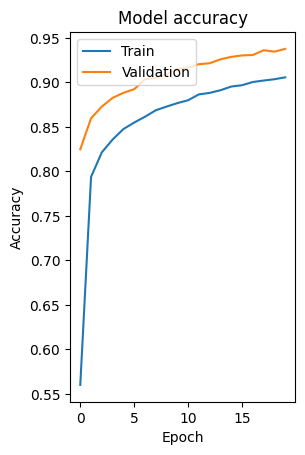

In [43]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

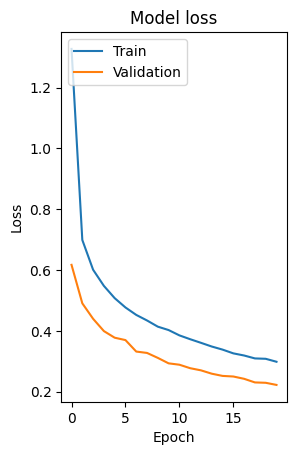

In [44]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

OBSERVATION: 

Model Accuracy Plot:

1. Training Accuracy: The training accuracy increases steadily over the epochs, showing that the model is learning and fitting the training data well

2. Validation Accuracy: The validation accuracy also increases over the epochs but appears to plateau and slightly fluctuate at higher epochs. This suggests the model is generalizing well to the validation data without significant overfitting

Model Loss Plot:

1. Training Loss: The training loss decreases steadily, indicating that the model is minimizing the error on the training data

2. Validation Loss: The validation loss also decreases but begins to flatten out towards the later epochs, similar to the validation accuracy. This shows that the model's performance on unseen data is consistent and stable

Observations:

1. No Significant Overfitting: There is no significant divergence between training and validation accuracy/loss, which indicates that the model is not overfitting the training data. Both curves follow a similar trend

2. Good Generalization: The validation accuracy and loss curves are close to the training curves, suggesting that the model generalizes well to the validation data

3. Stability: Both the accuracy and loss plots show stability in the later epochs, indicating that the model has reached a good balance between bias and variance

In [45]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [46]:
# Step 2: Generate the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

In [47]:
cm

array([[1690,   33,    6,    9,    6,    3,   19,    6,   14,   28],
       [  24, 1696,    9,   27,   27,    3,    5,   24,   10,    3],
       [  12,   17, 1642,   21,   14,    4,    3,   29,   23,   38],
       [   3,   26,   18, 1507,   11,   53,   19,   22,   42,   18],
       [  10,   53,   17,   11, 1651,    5,   12,    5,   21,   27],
       [   4,   11,    9,   64,    7, 1586,   47,    6,   18,   16],
       [  37,   11,   10,   18,   15,   40, 1607,    6,   76,   12],
       [  15,   45,   24,   16,   11,    1,    4, 1679,    5,    8],
       [  17,   26,   12,   32,    6,    6,   45,    8, 1622,   38],
       [  51,   22,   18,   33,   15,   15,    7,   12,   29, 1602]])

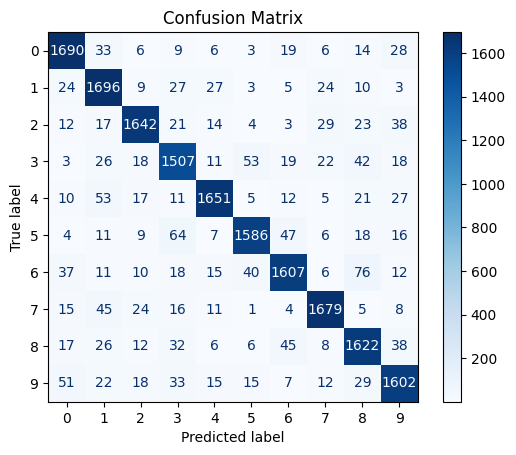

In [48]:
# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [49]:
#Printing classification report

from sklearn.metrics import classification_report

# Step 4: Generate the classification report
report = classification_report(Y_true, Y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1814
           1       0.87      0.93      0.90      1828
           2       0.93      0.91      0.92      1803
           3       0.87      0.88      0.87      1719
           4       0.94      0.91      0.92      1812
           5       0.92      0.90      0.91      1768
           6       0.91      0.88      0.89      1832
           7       0.93      0.93      0.93      1808
           8       0.87      0.90      0.88      1812
           9       0.89      0.89      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.91      0.90      0.90     18000

